# Perfect March Madness: A Machine Learning Approach for Optimized Bracket Predictions

## Tyler Jonathan Bolebruch (tbolebruch0221), Md Jami Bin Mosharf Navid (Jami-Navid), Jordan Kakuyo (jkakuyo), (POC) Chinedu Okeke (cokeke2026)


**Introduction**

Our dataset will feature various team statistics, advanced analytics, and historical data surrounding the NCAA’s main postseason tournament, otherwise known as March Madness. Our initial goal is to focus on data from the last 20 years collected from various sites such as sports-reference, kenpom, and barttorvik. We will try to encapsulate recency by doing so, while also taking into account other details outside of just traditional stats. These will include whether a team is on a hot streak (ex: won their Conference tournament, have a higher winning percentage in the last 10 games compared to their seasonal percentage). We will also look to cluster teams in an attempt to account for teams not playing each other or similar opponents. Our main goal is to create an algorithm that can accurately predict the outcome of this tournament. Unlike other postseason tournaments or playoffs, March Madness features a multitude of teams with various makeups, playstyles and conferences, many of which have not played a similar set of teams, let alone each other. Because of this the odds of picking a perfect bracket are 1 in 9.2 quintillion, and this is without accounting for the factors above. So it comes to no surprise that no one has created a perfect bracket, with the closest reported person predicting the first 49 of 67 games, before making a mistake. With this model we seek to attempt to rectify this issue as best as possible. This can not only increase prediction accuracy, but also help with bettors attempting to make bets, people attempting to process large amounts of data to make their own brackets, and even benefit people trying to make plans to watch later round games without knowing who may be playing in said game. 

**Literature Review**

In addressing Heilmeier's question—"How is it done today, and what are the limits of current practice?"—we delve into current methodologies and their limitations in predicting outcomes of the NCAA Men's Basketball Tournament, commonly known as March Madness. Recent studies have explored various machine learning techniques to predict the outcomes of March Madness games. Goldstein (2024) conducted a comparative analysis using three different machine learning algorithms: Logistic Regression, Decision Trees, and Support Vector Machines. The study utilized historical game data, team statistics, and player performance metrics to train the models. The findings indicated that while these models could achieve moderate predictive accuracy, their performance was often hindered by the unpredictable nature of the tournament and the limited availability of comprehensive data. Similarly, Wen (2017) investigated the application of machine learning methods to predict tournament results. The research focused on feature selection techniques to identify the most significant variables influencing game outcomes. Despite employing advanced algorithms, the study concluded that the inherent variability in team performances and external factors such as player injuries and game-day conditions posed significant challenges to accurate predictions. Kocher (2018) developed a predictive model for the NCAA Men's Basketball Tournament using logistic regression. The model incorporated variables such as team efficiency ratings, strength of schedule, and historical performance. While the model demonstrated some predictive power, it struggled with the tournament's inherent unpredictability, particularly in forecasting upsets. Other studies have highlighted the importance of also utilizing non-box score statistics to help improve the models performance, such as distance from home and fan attendance. Shen et al. (2016) utilized this approach by selecting 8 non-box score variables and 4 models to predict a bracket. Their findings suggested that the ANN model performed best, with an accuracy of 67% followed by SVM at 65% and KNN at 63%. Although due to the nature of the tournament, predicting the outcome with high accuracy is difficult, with many models producing accuracy results around 70%(Kim et al., 2023). In a practical application, a data science enthusiast attempted to predict March Madness upsets using regression models in R. The approach involved creating two models to identify potential upsets in the 2022 NCAA Tournament. Despite the innovative approach, the unpredictable nature of the tournament limited the models' effectiveness.

**Data**

The dataset was scraped from Sports Reference, a reputable sports analytics website containing statistics on various sporting events from College basketball to WNBA data. Our data was focused on the men's NCAA Division 1 college basketball tournament. We looked into basic and advanced stats from 2019 to 2025. The dataset comprises 552 rows and 151 columns, each row containing the stats of a single game from both the opponent and the main team's perspective. The data mostly comprises numeric features (including 136 columns of float64 features and 13 columns containing int64). There is one categorical feature that contains the names for each team. In addition to this, our target variable “Win” has been encoded as a binary variable, with wins represented as 1 and losses as 0. Based on the barplot below, the distribution between wins and losses is relatively even, although there is minimal evidence of skewness towards the loss category. We ran a correlation test and plotted the results to identify features that may strongly influence our target variable. As seen below, some of the features with the strongest correlation to winning include, G_X(games played), SOS_X(strength of schedule), ft%_season_end(free throw percentage at the end of season), SRS_x(simple rating system) and ORtg,last_five_reg(offensive rating in the last five games).    

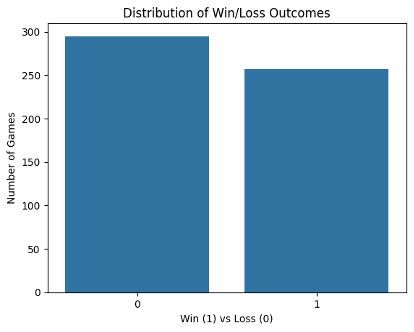 

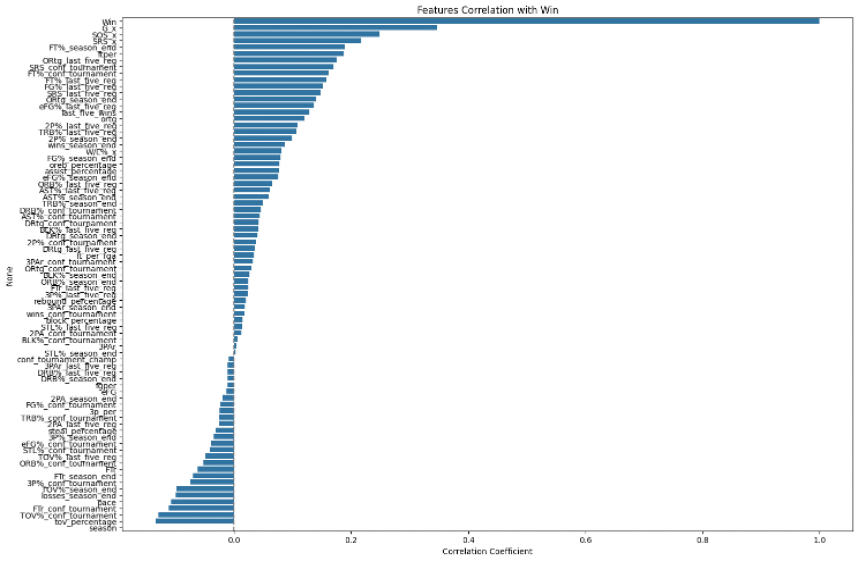
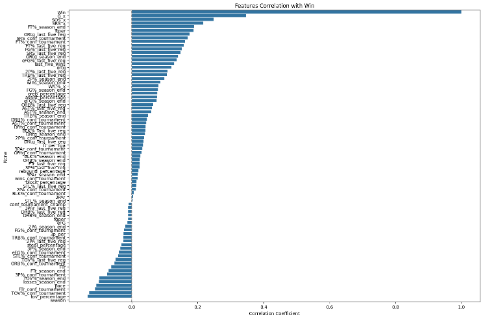

**Methods**

**Scraping**

To retrieve all our data, we began by developing a web scraping pipeline to grab our data from Sports Reference. We began by scraping through the NCAA website for teams that have been D1 since 2002 and their IDs. Once found, we were able to use the team IDs to retrieve the links to their teams statistics and season. Next, we developed a function that retrieves a URL for a game, and scrapes the simple box score table and the advanced box score table for the given team. It takes the bottom row of both of these tables, which is the row for team totals, and if the function is able to find both of these tables, then it merges them together. This outputs a single row of data that has the team totals for both basic and advanced metrics for the given game. If the function is not able to find both tables, then it returns "Does not Exist". Next we began the actual scraping for the trend variable by scraping a given team and season url, using the team ids scraped from before. With this link, we create a table of all the team's games, subset the NCAA tournament games (the ones we will be predicting), conference tournament games, and last five regular season games. For the conference tournament and last five games, we used the function created previously on each game in both dataframes. This gives the team totals for each game entered in. When we have a dataframe of team totals from all the games, we calculate the average across them all and merge this to the NCAA tournament games. We do the same thing with the conference tournament and last five regular season games combined. Now, we have a row for each NCAA tournament game since 2002, with data on the team's performance in the last five regular season games, conference tournament games, and both combined. Following this we began scrapping both basic and advanced stats for each year in our range. Filtering for teams that only made the tournament, all the season data was then merged into a final dataframe. Finally we merged our two data frames together. At that point, we have two rows for each game. In order to make only one row for each game, we merge the data to itself, combining all games to themselves. In this step, we add an opponent suffix so that you know those columns are for the opponent. From here, we remove all the rows where the team joined with itself. At this point, we have our final dataset. This dataset has a row for each NCAA tournament game since 2002 that we were able to scrape. Each row has a random team as the "point of view" team, along with their stats, their opponent's stats, and whether they won the game (our response variable)

**Pre-Processing and Initial Modeling:**

After collecting the data, we split it into team and opponent stats for clustering and dimensionality reduction. This was achieved by selecting all columns containing the word opponent, and creating a new dataframe with those features. All the opponent columns were then dropped from the original dataset, so we now had two datasets, one with the team stats and another with the opponents. Following the split, we utilized a standard scaler to standardize the data to ensure consistency, which is essential for PCA and modeling. Next, we utilized K-means to cluster the teams based on their performance in the tournament. As mentioned previously, we chose to cluster teams and use their labels as an input feature in the model, as this may provide further insight. Most teams in the tournament do not play each other regularly; therefore, clustering them based on their statistical performance allows us to capture hidden patterns such as how one team cluster performs against another. We used three performance metrics to identify the ideal number of clusters: the inertia score, Davies Bouldin, and Silhouette score. After creating a loop that tested between 2 and 9 clusters, for both the team and opponent data, it was determined that the ideal number of clusters was 5. After clustering the teams, the cluster labels were saved and added to the model later. Next, we implemented PCA to reduce the dimensionality of the data. We began this step by creating a train and test split using the original data(pre-clustered). The tests set contained data for the 2024 and 2025 seasons, while the training set comprised all the other seasons. Following this step, we performed the same feature transformations as previously done on the clustered data, which included splitting teams and opponents and scaling the data.. Next, to preserve as much variance as possible, we first calculated the explained variance for each principal component. Following this, we applied cumsum from numpy to find the cumulative explained variance. Once calculated, we set a threshold of 0.95 and calculated the fewest number of principal components needed to preserve 95% variance. Once calculated, the opponent and team data were fit to the final PCA using 27 components and then visualized on a scatter plot with the first principal component on the x-axis and the second on the y. Following the PCA, the cluster labels were added to the final dataset and one-hot encoded so they could be used as a feature in the model. Finally, after completing all pre-processing steps, we could begin modeling. Our dataset was trained on five models: Random Forest, XGboost, Logistic Regression, SVC, and a Neural Network. To measure the performance of each model, we evaluated our data based on the F1 and accuracy scores. Initially, each model was run without hyperparameter tuning, which did not produce great results. For example, the random forest model produced an accuracy score of 71% and an F1 score of 61%. Following the first trial, GridSearchCV was implemented on each model to determine the best hyperparameters. After tuning, a few models demonstrated predictive power, but none of the F1 scores were greater than 71%, except the Neural Network. Therefore, moving forward the Neural Network our chosen model as it was the best-performing one, producing an accuracy score of 76.4% and an F1 of 76.


**Neural Network Model:**

To complement our traditional machine learning models and explore the potential of deep learning in binary classification, we implemented a Neural Network (NN) using Keras with TensorFlow. The target variable for this model was Win, which indicated whether a team won (1) or lost (0) a game. The model was trained on a dataset combining principal components and cluster labels, representing both the team and their opponent.
Following PCA, we concatenated 27 principal components for the team and 27 for the opponent, resulting in a combined feature set of 54 dimensions. Additionally, we included one-hot encoded cluster labels derived from K-Means clustering to provide contextual groupings of similar teams and opponents. These clusters offered insight into performance characteristics that could enhance prediction accuracy.
Our initial neural network architecture included an input Dense layer with 128 neurons and ReLU activation, followed by a Dropout layer with a 0.2 rate to mitigate overfitting. A second Dense layer with 64 neurons and another Dropout layer was added before the final output layer. The output layer consisted of a single neuron with a sigmoid activation function, appropriate for binary classification tasks. We used the Adam optimizer (learning rate = 0.001) and binary crossentropy as the loss function.
To optimize performance, we applied hyperparameter tuning using GridSearchCV integrated with KerasClassifier from Scikeras. The grid search explored several configurations: number of neurons in the first layer (64, 128), dropout rates (0.2, 0.3), batch sizes (16, 32), and learning rates (0.001, 0.0005). A 3-fold cross-validation strategy was employed to ensure robustness and generalizability. The best combination of hyperparameters identified through this search was: 128 neurons, a dropout rate of 0.2, batch size of 16, and learning rate of 0.001.
With these optimized settings, we trained the final model using early stopping (patience = 5, monitoring validation loss) to prevent overfitting. The model achieved a test accuracy of 76.4% on the holdout dataset (2024 and 2025 seasons) over 150 epochs.
For further evaluation, we examined the classification report and confusion matrix. The model achieved a precision of 0.89 and recall of 0.67 for predicting losses, and a precision of 0.67 and recall of 0.89 for predicting wins. The macro-averaged F1-score was 0.76, indicating balanced performance across both classes. The confusion matrix further confirmed that the model correctly classified 65 out of 85 samples.

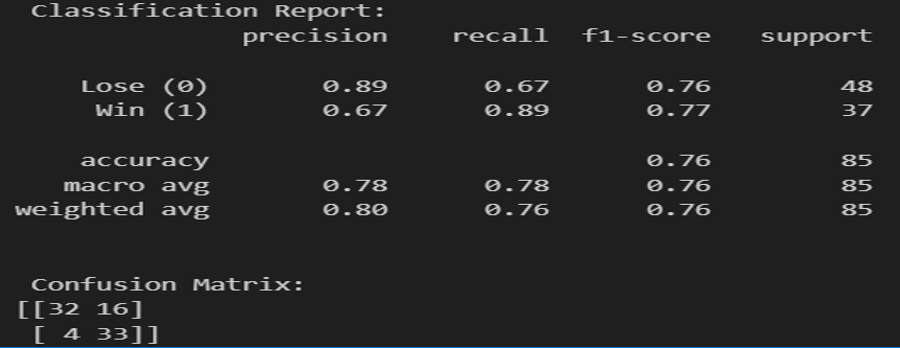
 
In summary, the neural network demonstrated strong performance, effectively leveraging the dimensionality-reduced and cluster-augmented dataset. Although its results were comparable to other models, the NN’s ability to capture nonlinear relationships provided an additional modeling perspective and reinforced the importance of thoughtful feature engineering, tuning, and regularization in achieving predictive success.


**Result**

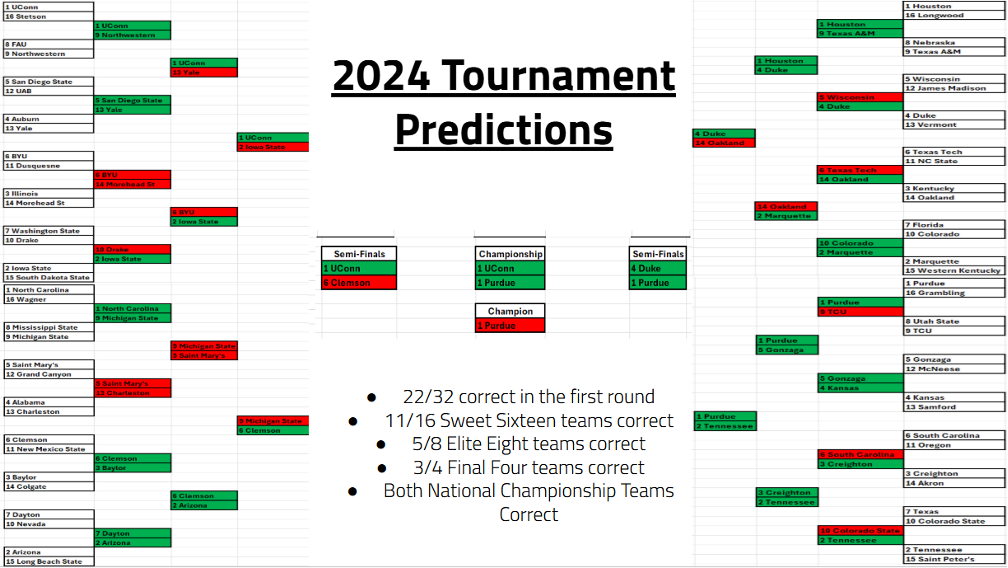

The above bracket shows our predictions for the 2024 NCAA March Madness tournament. We had also made predictions for the 2025 season, but since this was such a unique year in terms of how “chalk” it was. We thought that 2024 was a more typical year, and our model had very good predictions. The model did not perform exceptionally well in the first or second round, but we performed well in the elite eight and even better in the final four. We also predicted the exact National Championship game matchup correctly, but we did not predict the winner correctly. While our model’s first round predictions did not perform as well as we would have liked, we were able to correctly predict two large upsets in 14 seed Oakland and 13 seed Yale.

While this shows how our model actually performed in a real world scenario, we also had hopeful performance metrics from our best model. The model that we ended up using was an artificial neural network. This model had an F1 score of almost 10 percentage points higher than the next best performing model (random forest) on the test set. We had worries that we would overfit when using the artificial neural network because of the small amount of data, but based on our F1 score and bracket for the 2024 tournament, it does not seem like there was any egregious overfitting.

Before we began modeling, we used KMeans clustering to group teams together. We included this in the model in hopes that the model could look back at previous matchups and draw information on the results of those same matchups. We found the optimal number of clusters to be five. We found that a lot of the teams in clusters four and five were the higher level teams (top 4-6 seeds), while clusters one and two were more of the mid-major or automatic-bid teams that only got in because they won their conference championship. These teams are typically on the lower end in terms of skill level, but can still come through and win a game in the tournament every once in a while (we saw this with Oakland and Yale). The third cluster was mostly made up of the lower level power five conference teams. Typically teams that were middle of the pack of their conference, but with the strength of the power five conferences, they were able to get in the tournament.

We wanted to explore how our clusters had an effect on the model’s predictions by taking a look at the final four and national championship games for the 2025 tournament. We had Auburn (surprisingly) in cluster 3 and Florida in cluster 5. We found that in our four years of train data, the cluster 5 team won 60% of the time (30/50). Our model’s predictions reflected this as we would have correctly predicted Florida to win this game. On the other side, we had Duke in cluster 5 and Houston in cluster 4. Cluster 4 won these matchups about 58.7% of the time (27/46). The model actually predicted the other way and had Houston winning, which is what actually happened. While we were right this time, a game like this shows how random this single game elimination tournament can be. This game was decided by only three points and featured a last minute comeback by Houston. This game truly could have gone either way, and we just ended up on the right end this time.


**Discussion**


Considering our circumstances and the difficulties that typically surround doing ML’s for March Madness, I would say that we achieved our goal. In general, it is near impossible to actually make a model that can make a perfect bracket, with the odds being 1 in 9.2 quintillion. It is even more dubious to expect a model to make said perfect prediction on a consistent year to year basis (i.e always be correct). With this understanding, we knew that our model would not be perfect, or close to it, no matter how many features we had or how much the models were hypertuned. So to measure success, it's much better to compare our model’s performance to other models that have been done in the past. Many of the models we looked at mostly used accuracy as their evaluation metric, with many of the models featuring scores around .7. Given our top model (Neural Network) had a F1 score around .76, we deemed it to be within the same ballpark as these other models. The addition of the accuracy scores for every prediction, also made us feel better about our model, as it gave more nuisance and insight to each decision made by the model. For example, the use of the clusters as a benchmark for how often we could see said team winning a potential matchup, paired with the prediction of the model itself, gave our model a lot more depth. 


**Limitations**


One of the main aspects that limited us was our amount of processing power and time. Since we were scraping all of the data we used and were using a plethora of different features, the data retrieval process was very time consuming. This led to the initial goal of 20 years of data to be quite ambitious. We ended with 6 years of data, using just four of those years to train the data. So the model does not have a lot of data and trends to look back at over a multitude of years unfortunately. Instead the model is probably favoring more recent trends that we have seen within the last few years when making said predictions (ie: more upsets). In addition, during the initial run of our Neural Network, we set a randomo sseed that helped us achieve the high accuracy score as reported above. However, this seed was not reimplemented in the final version of our code. As a result, attemps to reporduce our results may not produce the same outcome as before.


**Future work**

From here there are many things we could do. For starters, we could maybe take the time to fine tune our model more, just to make sure we have the best one possible. One of the main future steps though, would be deciding whether to add in the additional data to our training set for the model. This was obviously the initial plan, and would make the data more inclusive of more tournament trends. This becomes even more important with the conclusion of the more recent tournament. When making predictions on 2024, there were a multitude of upsets and double digit seeds making waves throughout the tournament, similar to many of the tournaments of the last couple years. On the other hand, this year’s tournament featured four number 1 seeds in the final four for the first time since the 2008 edition of the tournament. These results can lead us to believe that despite recent trends, the NCAA tournament could be trending back to the mean, where the favored teams win much more often in comparison to the more recent entries. Due to this, it would make sense to obtain more processing and computing power to load in and scrape this data, and use it in training the model in the future. 

